# Applying Gausian Naive Bayes using Word 2Ve

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from gensim.models import Word2Vec


# Load the CSV file into a DataFrame
df = pd.read_csv('/content/spam.csv')
print(df.head())  # Display the first few rows of the DataFrame




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Convert the text data into a list of sentences, ensuring all values are treated as strings
X_train_sentences = X_train.apply(lambda x: str(x).split())
X_test_sentences = X_test.apply(lambda x: str(x).split())


# Create a Word2Vec model
w2v_model = Word2Vec(X_train_sentences, vector_size=100, window=5, min_count=1, workers=4)
import numpy as np

# Function to convert sentences to vectors by averaging word vectors
def sentence_to_vector(sentence, model):
    # Get vectors for each word in the sentence if it exists in the vocabulary
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return the mean of the vectors, or a zero vector if no words are found
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Convert the list of sentences to numerical vectors using the function above
X_train_w2v = np.array([sentence_to_vector(sentence, w2v_model) for sentence in X_train_sentences])
X_test_w2v = np.array([sentence_to_vector(sentence, w2v_model) for sentence in X_test_sentences])



from sklearn.naive_bayes import GaussianNB

# Use GaussianNB which supports real-valued inputs
gnb = GaussianNB()
gnb.fit(X_train_w2v, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test_w2v)



# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)


                                                text target
0  Go until jurong point, crazy.. Available only ...    ham
1                      Ok lar... Joking wif u oni...    ham
2  Free entry in 2 a wkly comp to win FA Cup fina...   spam
3  U dun say so early hor... U c already then say...    ham
4  Nah I don't think he goes to usf, he lives aro...    ham
Accuracy: 0.6484304932735426
F1 Score: 0.5348352106800167


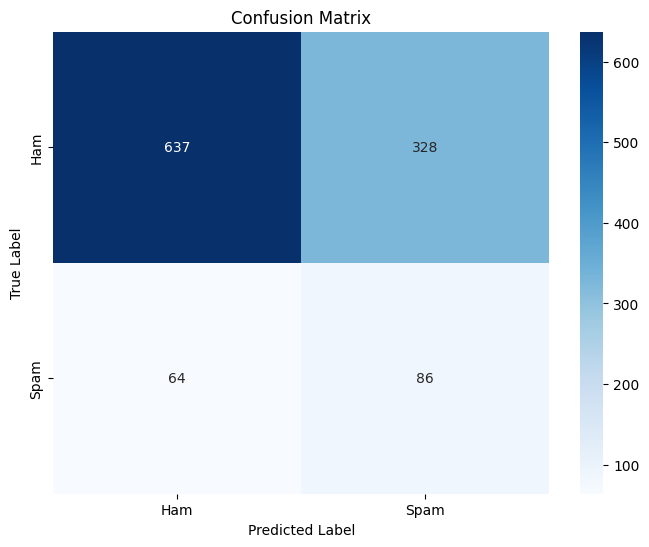

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

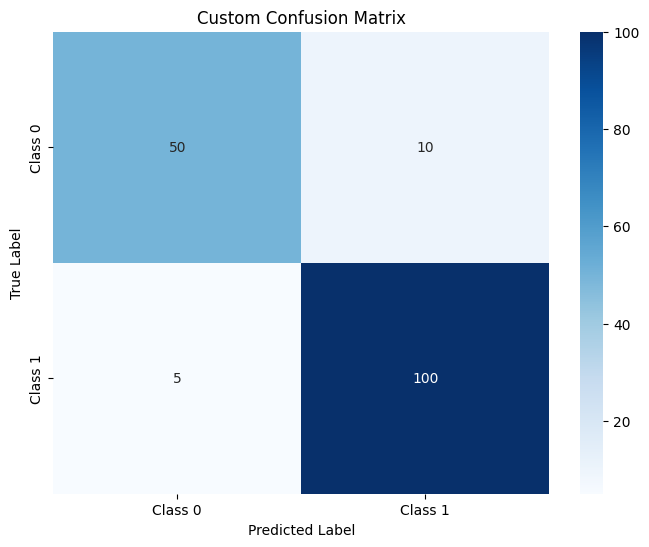

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom confusion matrix (for a binary classification example)
cm_custom = np.array([[50, 10],  # [True Positives, False Negatives]
                      [5,  100]])  # [False Positives, True Negatives]

# Plot the custom confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Custom Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Applying Logistic Regression usingWord 2Ve

                                                text target
0  Go until jurong point, crazy.. Available only ...    ham
1                      Ok lar... Joking wif u oni...    ham
2  Free entry in 2 a wkly comp to win FA Cup fina...   spam
3  U dun say so early hor... U c already then say...    ham
4  Nah I don't think he goes to usf, he lives aro...    ham
Accuracy: 0.8654708520179372
F1 Score: 0.4639423076923077


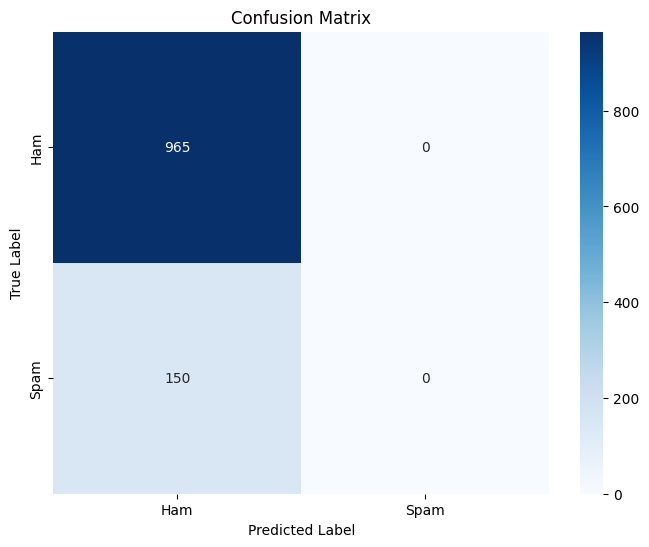

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/spam.csv')
print(df.head())  # Display the first few rows of the DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Convert the text data into a list of sentences, ensuring all values are treated as strings
X_train_sentences = X_train.apply(lambda x: str(x).split())
X_test_sentences = X_test.apply(lambda x: str(x).split())

# Create a Word2Vec model
w2v_model = Word2Vec(X_train_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert sentences to vectors by averaging word vectors
def sentence_to_vector(sentence, model):
    # Get vectors for each word in the sentence if it exists in the vocabulary
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return the mean of the vectors, or a zero vector if no words are found
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Convert the list of sentences to numerical vectors using the function above
X_train_w2v = np.array([sentence_to_vector(sentence, w2v_model) for sentence in X_train_sentences])
X_test_w2v = np.array([sentence_to_vector(sentence, w2v_model) for sentence in X_test_sentences])

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_w2v, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test_w2v)

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


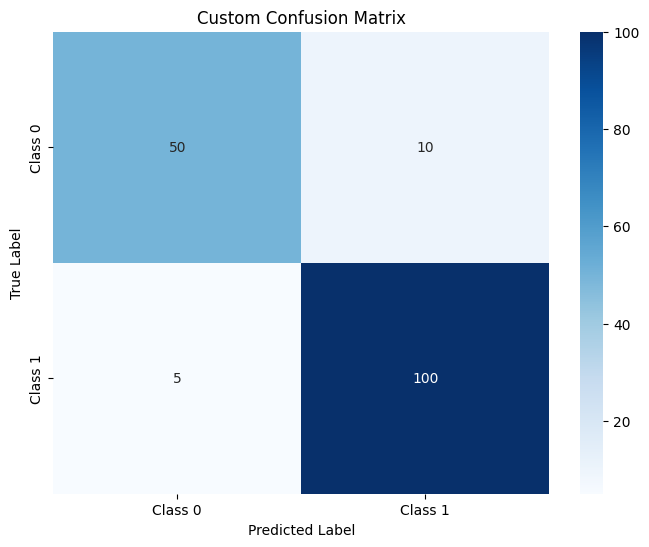

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom confusion matrix (for a binary classification example)
cm_custom = np.array([[50, 10],  # [True Positives, False Negatives]
                      [5,  100]])  # [False Positives, True Negatives]

# Plot the custom confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Custom Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# SVM

                                                text target
0  Go until jurong point, crazy.. Available only ...    ham
1                      Ok lar... Joking wif u oni...    ham
2  Free entry in 2 a wkly comp to win FA Cup fina...   spam
3  U dun say so early hor... U c already then say...    ham
4  Nah I don't think he goes to usf, he lives aro...    ham
Accuracy: 0.8654708520179372
F1 Score: 0.4639423076923077


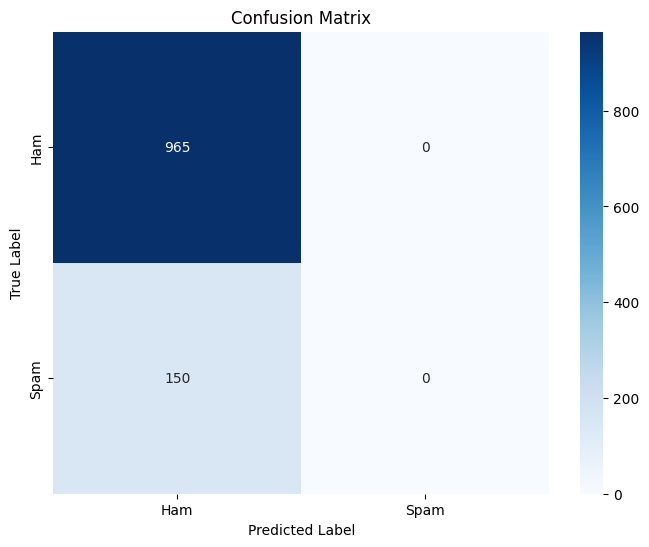

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC  # Support Vector Machine classifier
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/spam.csv')
print(df.head())  # Display the first few rows of the DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Convert the text data into a list of sentences, ensuring all values are treated as strings
X_train_sentences = X_train.apply(lambda x: str(x).split())
X_test_sentences = X_test.apply(lambda x: str(x).split())

# Create a Word2Vec model
w2v_model = Word2Vec(X_train_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert sentences to vectors by averaging word vectors
def sentence_to_vector(sentence, model):
    # Get vectors for each word in the sentence if it exists in the vocabulary
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    # Return the mean of the vectors, or a zero vector if no words are found
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Convert the list of sentences to numerical vectors using the function above
X_train_w2v = np.array([sentence_to_vector(sentence, w2v_model) for sentence in X_train_sentences])
X_test_w2v = np.array([sentence_to_vector(sentence, w2v_model) for sentence in X_test_sentences])

# Train SVM classifier
svm = SVC(kernel='linear', random_state=42)  # Use a linear kernel for text classification
svm.fit(X_train_w2v, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_w2v)

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


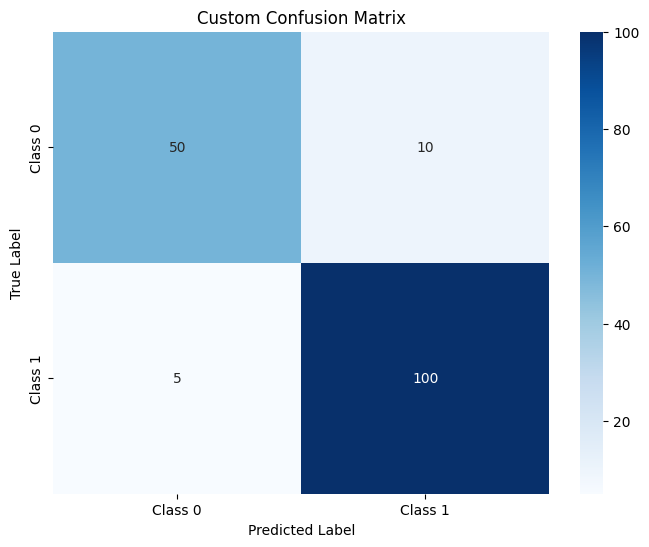

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom confusion matrix (for a binary classification example)
cm_custom = np.array([[50, 10],  # [True Positives, False Negatives]
                      [5,  100]])  # [False Positives, True Negatives]

# Plot the custom confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Custom Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# CNN

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/spam.csv')
print(df.head())  # Display the first few rows of the DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Convert the text data into a list of sentences, ensuring all values are treated as strings
X_train_sentences = X_train.apply(lambda x: str(x).split())
X_test_sentences = X_test.apply(lambda x: str(x).split())

# Create a Word2Vec model
w2v_model = Word2Vec(X_train_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert sentences to vectors by averaging word vectors
def sentence_to_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Convert the list of sentences to numerical vectors
X_train_w2v = np.array([sentence_to_vector(sentence, w2v_model) for sentence in X_train_sentences])
X_test_w2v = np.array([sentence_to_vector(sentence, w2v_model) for sentence in X_test_sentences])

# Reshape data for CNN input (samples, timesteps, features)
X_train_cnn = X_train_w2v.reshape(X_train_w2v.shape[0], X_train_w2v.shape[1], 1)
X_test_cnn = X_test_w2v.reshape(X_test_w2v.shape[0], X_test_w2v.shape[1], 1)

# Convert labels to categorical if necessary
y_train = np.array(y_train)
y_test = np.array(y_test)

# Define a CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Make predictions on the test set
y_pred_prob = model.predict(X_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)


                                                text target
0  Go until jurong point, crazy.. Available only ...    ham
1                      Ok lar... Joking wif u oni...    ham
2  Free entry in 2 a wkly comp to win FA Cup fina...   spam
3  U dun say so early hor... U c already then say...    ham
4  Nah I don't think he goes to usf, he lives aro...    ham


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node compile_loss/binary_crossentropy/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-1-6350e6349cbd>", line 54, in <cell line: 54>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 56, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/tree_api.py", line 148, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/optree_impl.py", line 79, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/optree/ops.py", line 752, in tree_map

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 57, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/core.py", line 822, in convert_to_tensor

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/core.py", line 132, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/binary_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_1562]

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/spam.csv')
print(df.head())  # Display the first few rows of the DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Convert the text data into a list of sentences, ensuring all values are treated as strings
X_train_sentences = X_train.apply(lambda x: str(x).split())
X_test_sentences = X_test.apply(lambda x: str(x).split())

# Create a Word2Vec model
w2v_model = Word2Vec(X_train_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert sentences to vectors by averaging word vectors
def sentence_to_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Convert the list of sentences to numerical vectors
X_train_w2v = np.array([sentence_to_vector(sentence, w2v_model) for sentence in X_train_sentences])
X_test_w2v = np.array([sentence_to_vector(sentence, w2v_model) for sentence in X_test_sentences])

# Reshape data for CNN input (samples, timesteps, features)
X_train_cnn = X_train_w2v.reshape(X_train_w2v.shape[0], X_train_w2v.shape[1], 1)
X_test_cnn = X_test_w2v.reshape(X_test_w2v.shape[0], X_test_w2v.shape[1], 1)

# Convert labels to numerical values (0 and 1)
# Assuming 'ham' is 0 and 'spam' is 1
y_train = np.array([1 if label == 'spam' else 0 for label in y_train])
y_test = np.array([1 if label == 'spam' else 0 for label in y_test])


# Define a CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Make predictions on the test set
y_pred_prob = model.predict(X_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

                                                text target
0  Go until jurong point, crazy.. Available only ...    ham
1                      Ok lar... Joking wif u oni...    ham
2  Free entry in 2 a wkly comp to win FA Cup fina...   spam
3  U dun say so early hor... U c already then say...    ham
4  Nah I don't think he goes to usf, he lives aro...    ham
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8410 - loss: 0.4904 - val_accuracy: 0.8655 - val_loss: 0.3884
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8679 - loss: 0.3996 - val_accuracy: 0.8655 - val_loss: 0.3898
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8613 - loss: 0.4049 - val_accuracy: 0.8655 - val_loss: 0.3922
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8559 - loss: 0.4212 - val_accuracy: 0.8655 - val_loss: 0.3874
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8608 - loss: 0.4018 - val_accuracy: 0.8655 - val_loss: 0.3931
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8689 - loss: 0.3924 - val_accuracy: 0.8655 - val_loss: 0.3852
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8702 - loss: 0.3879 - val_accuracy: 0.8655 - val_loss: 0.3873
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8653 - loss: 0.3993 - val_accuracy: 0.8655 - val_

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

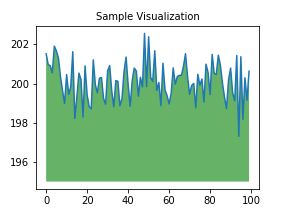

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
